R1 - NOTA 6: Use a imagem circulo.png para implementar um código que:

Segmenta apenas as 2 maiores áreas da imagem circulo.png. Use a técnica que achar mais apropriada. E exiba o resultado. (máx 3 pontos)

Calcule e exiba a área e o centro de massa das regiões segmentadas da imagem. O resultado esperado e uma imagem com marcação no centro indicando o Centro de Massa e o valor da área; (máx 3 pontos)

Essa rubrica pode ser feita no jupyter notebook ou google Colab.

*** R2 - NOTA 8: Faz o R1 e: ***

Traça uma reta entre os dois centros segmentados; (máx 0,5 pontos) Calcula o ângulo de inclinação da reta em relação ao plano horizontal, inclinação em graus. O resultado esperado é uma imagem com uma reta entre centros e o valor do ângulo exibido na tela; (máx 1,5 pontos)

Essa rubrica pode ser feita no jupyter notebook ou google Colab.

{'m00': 22612.0, 'm10': 13839202.0, 'm01': 9040648.0, 'm20': 8510710276.333333, 'm11': 5533136510.666666, 'm02': 3655261848.0, 'm30': 5258641259588.0, 'm21': 3402718048390.5, 'm12': 2237123864230.3335, 'm03': 1493948269866.0, 'mu20': 40715937.18580055, 'mu11': -3144.5118227005005, 'mu02': 40662685.61259556, 'mu30': 235515.8251953125, 'mu21': 517732.2747898102, 'mu12': -238923.5781402588, 'mu03': -508230.31103515625, 'nu20': 0.07963179073445123, 'nu11': -6.15000230216046e-06, 'nu02': 0.07952764188201565, 'nu30': 3.063180949276719e-06, 'nu21': 6.733762538660227e-06, 'nu12': -3.1075030830108083e-06, 'nu03': -6.610177491541478e-06}
{'m00': 22481.0, 'm10': 2446711.5, 'm01': 2991731.0, 'm20': 306505949.0, 'm11': 325611876.25, 'm02': 438354039.8333333, 'm30': 42112201718.75, 'm21': 40789529797.916664, 'm12': 47710914591.25, 'm03': 69041584697.5, 'mu20': 40218988.267281264, 'mu11': 7915.456151902676, 'mu02': 40219865.3588438, 'mu30': -700396.8390655518, 'mu21': -1452942.3043251038, 'mu12': 704

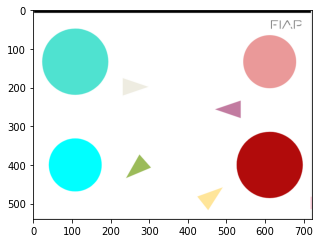

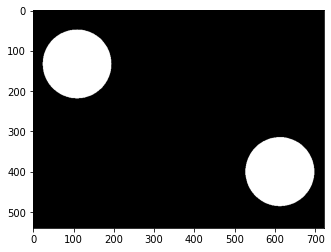

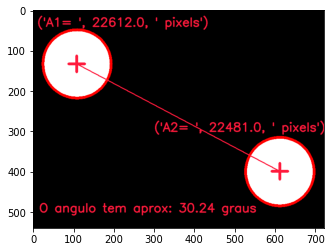

In [ ]:
#God forgive me for what I'm about to code


#realizando os imports de imagem e bibliotecas.

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import math




############ R1 parte 1 e 2 ##############



#atrelando imagem
img = cv2.imread('circulo.png')

#modificando a escala de cor para RGB e para HSV
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#definindo o intervalo de mascara de cor
image_lower_hsv = np.array([0, 165, 150])  
image_upper_hsv = np.array([180, 240, 240])

#aplicando mascara
mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)


#criando contorno
contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



# Criando cópia da mascara de contorno para desenhar por cima
mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() 
cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);


#calculando área do primeiro seguimento
area = cv.contourArea(contornos[0])

#Exibindo área na imagem 
font = cv2.FONT_HERSHEY_SIMPLEX
text = "A1= ",area," pixels"
origem = (10,40)
cv2.putText(contornos_img, str(text), origem, font,1,(255,26,60),2,cv2.LINE_AA)

#calculando área do segundo seguimento

area = cv.contourArea(contornos[1])

font = cv2.FONT_HERSHEY_SIMPLEX 
text = "A2= ",area," pixels"
origem = (300,300)
cv2.putText(contornos_img, str(text), origem, font,1,(255,26,60),2,cv2.LINE_AA)


#boas praticas da documentação para aplicar calculo do centro de massa (repeti o codigo mudando o index no array para pegar o outro circulo e apliquei em outra variavel)
cnt = contornos[0]

M = cv2.moments(cnt)
print( M )

cnt2 = contornos[1]

N = cv2.moments(cnt2)
print(N)


#Calculo da posição do centro de massa (apliquei a lógica duas vezes e mudei a variavel que recebe os parâmetros)

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

print("centro de massa na possição: ",cx, cy)

cxb = int(N['m10']/N['m00'])
cyb = int(N['m01']/N['m00'])

print("centro de massa na possição: ",cxb, cyb)



# Definindo cor e tamanho para os indicadores de centro de massa no primeiro circulo

size = 20
color = (255,26,60)

cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)


'''
 Definição de fonte para saída dos dados de posição no primeiro circulo
font = cv2.FONT_HERSHEY_SIMPLEX
text = cx , cy
origem = (520,290)
cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)

'''
#mesma logica para segundo circulo 
size = 20
color = (255,26,60)

cv2.line(contornos_img,(cxb - size,cyb),(cxb + size,cyb),color,5)
cv2.line(contornos_img,(cxb,cyb - size),(cxb, cyb + size),color,5)

'''
font = cv2.FONT_HERSHEY_SIMPLEX
text = cxb , cyb
origem = (0,50)
cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)

comentei esses dois trechos pois os pontos xy do centro de massa de cada circulo não sao pedidos, e apenas a demarcação em si no ponto

'''


############## R2 ###########



#criando a linha reta entre os dois centros de massa(Até onde eu entendi da sintaxe do line no cv2 tem como pimeiro parametro a saída, e depois os pontos "inicio" e "fim" da reta, então foi uma lógica fácil)
cv2.line(contornos_img,(cx,cy),(cxb,cyb),color,2)

#definindo angulo de inclinação da linha em relação ao eixo x (demorei pra cct pra conseguir isso aqui certo)



angulo_grau = math.degrees(math.atan2((cy-cyb),(cx-cxb)))

font = cv2.FONT_HERSHEY_SIMPLEX
text = "O angulo tem aprox: "+f'{tan:.2f}'+" graus"
origem = (15,500)
cv2.putText(contornos_img, str(text), origem, font,1,(255,26,60),2,cv2.LINE_AA)





#saídas
plt.figure(figsize=(5,5))
plt.imshow(img); 
plt.show()
plt.imshow(mask_hsv, cmap="Greys_r", vmin=0, vmax=255)
plt.show()
plt.imshow(contornos_img);
plt.show()

